In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import *
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [56]:
#base de dados - 01.01.2004 á 31.12.2023

df = pd.read_csv('/content/Dados Históricos - Ibovespa.csv', delimiter=',', encoding='utf-8')

In [57]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,28.12.2023,134.185,134.194,134.392,133.832,"7,81M","-0,01%"
1,27.12.2023,134.194,133.523,134.195,133.328,"6,17M","0,49%"
2,26.12.2023,133.533,132.753,133.645,132.753,"5,15M","0,59%"
3,22.12.2023,132.753,132.182,133.035,132.094,"8,23M","0,43%"
4,21.12.2023,132.182,130.826,132.277,130.822,"8,68M","1,05%"


#Analise Exploratória dos Dados

In [58]:
df.describe()

,Último,Abertura,Máxima,Mínima
count,4951.000000,4951.000000,4951.000000,4951.000000
mean,66.826271,66.804307,67.475450,66.141634
std,27.997196,27.987919,28.185309,27.796883
min,17.604000,17.607000,18.387000,17.601000
25%,49.095500,49.089000,49.647000,48.452000
50%,60.643000,60.582000,61.275000,59.921000
75%,85.790000,85.768000,86.631000,85.052000
max,134.194000,134.194000,134.392000,133.832000


In [59]:
df.shape

(4951, 7)

In [60]:
df.dtypes

Data         object
Último      float64
Abertura    float64
Máxima      float64
Mínima      float64
Vol.         object
Var%         object
dtype: object

In [61]:
df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')

In [62]:
df_fechamento = df[['Data', 'Último']]

df_fechamento.set_index('Data', inplace=True)

df_fechamento.sort_index(inplace=True)

display(df_fechamento.head())

<ipython-input-62-b9afc923fe42>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechamento.sort_index(inplace=True)


,Último
Data,
2004-01-02,22.445
2004-01-05,23.532
2004-01-06,23.576
2004-01-07,23.320
2004-01-08,23.717


In [63]:
df.set_index('Data', inplace=True)

In [64]:
df.sort_index(inplace=True)

In [65]:
df.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2004-01-02,22.445,22.233,22.450,22.208,"136,42M","0,94%"
2004-01-05,23.532,22.445,23.532,22.445,"496,71M","4,84%"
2004-01-06,23.576,23.532,23.976,23.180,"472,38M","0,19%"
2004-01-07,23.320,23.576,23.899,23.320,"464,08M","-1,09%"
2004-01-08,23.717,23.334,23.718,23.122,"436,74M","1,70%"


In [66]:
df['Var%'] = df['Var%'].str.replace('%', '').str.replace(',', '.').astype(float)

In [67]:
def convert_volume(vol):
    if isinstance(vol, str):
        if 'M' in vol:
            return float(vol.replace('M', '').replace(',', '.')) * 1e6
        elif 'K' in vol:
            return float(vol.replace('K', '').replace(',', '.')) * 1e3
        elif 'B' in vol:
            return float(vol.replace('B', '').replace(',', '.')) * 1e9
        return float(vol.replace(',', '.'))
    return vol

df['Vol.'] = df['Vol.'].apply(convert_volume)

In [68]:
nulos = df.isnull().sum()
print(nulos)

Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64


In [69]:
df.dropna(inplace=True)

In [70]:
df.dtypes

Último      float64
Abertura    float64
Máxima      float64
Mínima      float64
Vol.        float64
Var%        float64
dtype: object

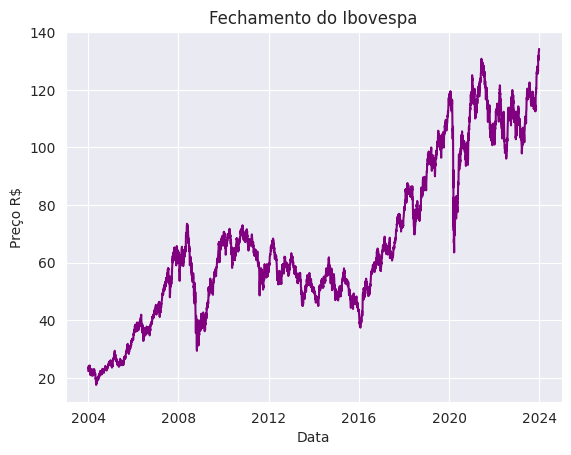

In [71]:
plt.plot(df.index, df.Último, color= 'purple')
plt.title('Fechamento do Ibovespa')
plt.xlabel('Data')
plt.ylabel('Preço R$')
plt.show()

In [72]:
resultados= seasonal_decompose(df_fechamento, model='multiplicative', period=12)

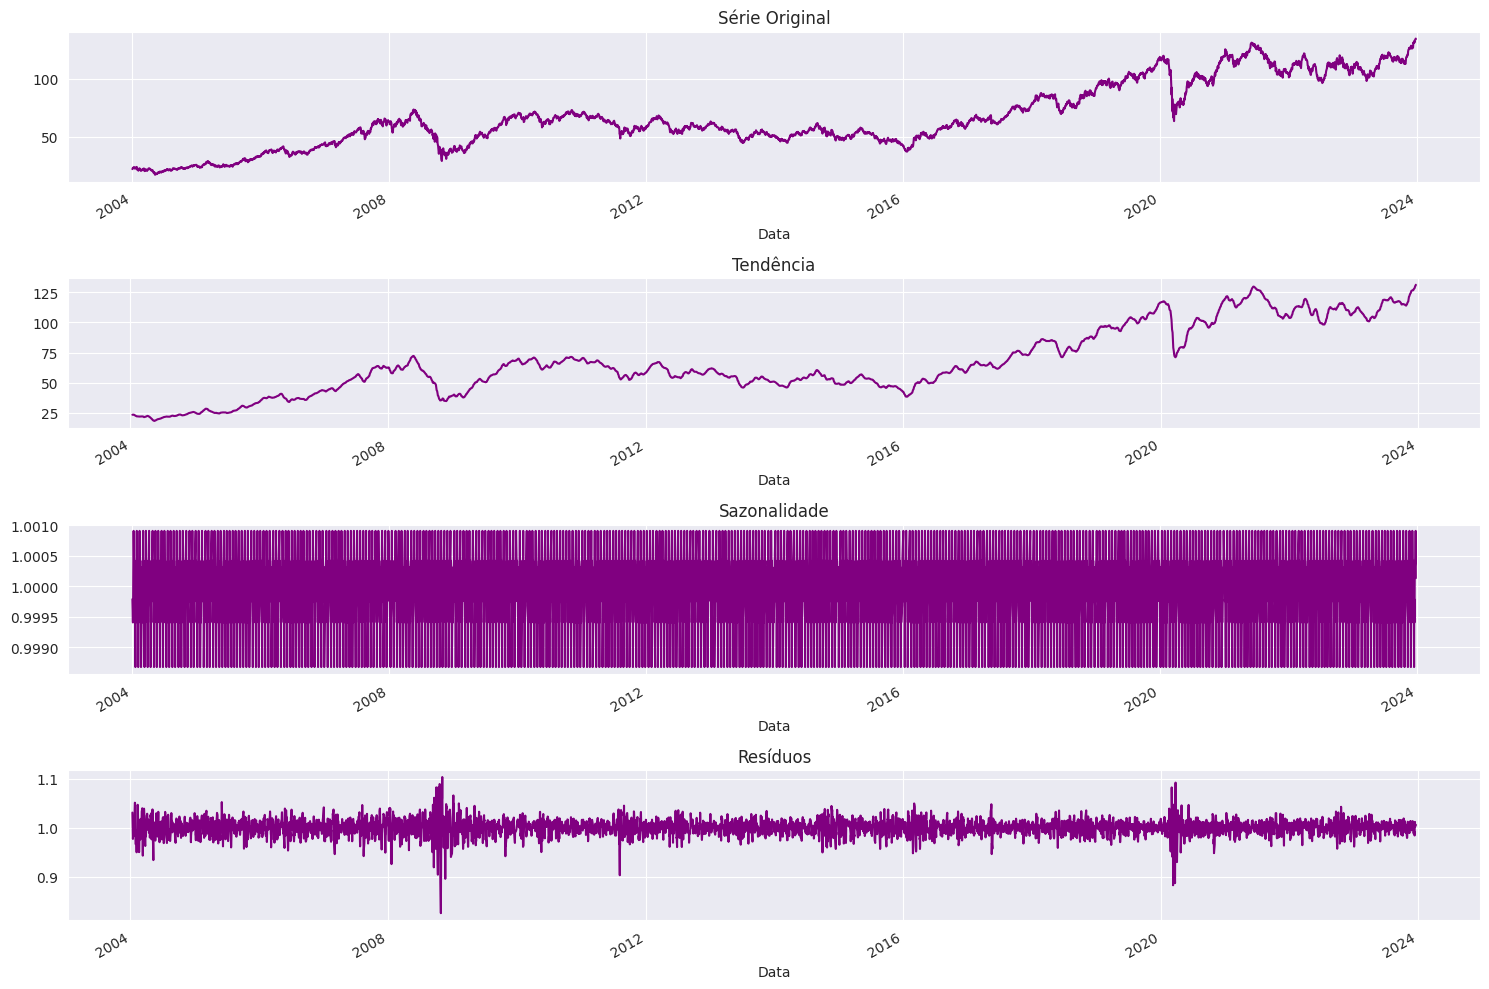

In [73]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))

resultados.observed.plot(ax=ax1, color='purple')
resultados.trend.plot(ax=ax2, color='purple')
resultados.seasonal.plot(ax=ax3, color='purple')
resultados.resid.plot(ax=ax4, color='purple')

ax1.set_title('Série Original')
ax2.set_title('Tendência')
ax3.set_title('Sazonalidade')
ax4.set_title('Resíduos')

plt.tight_layout()
plt.show()

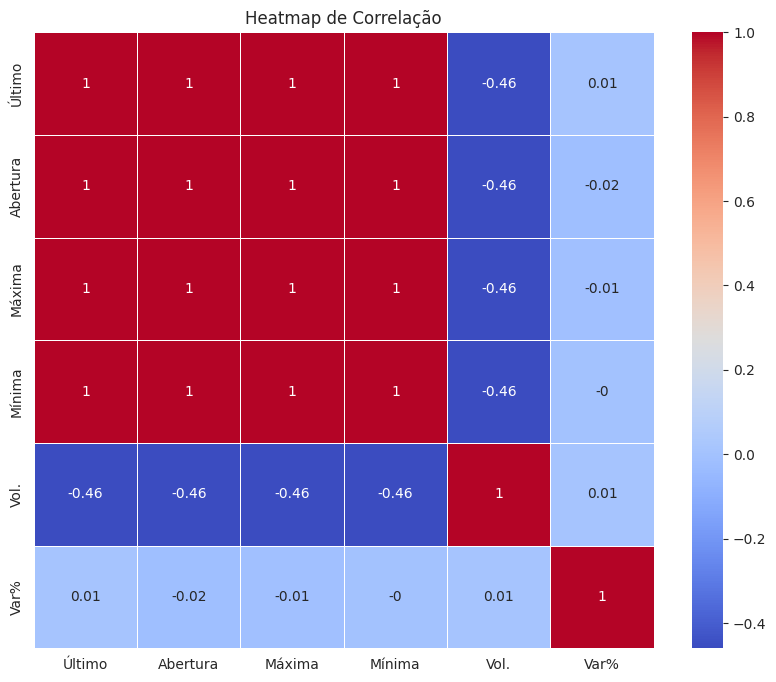

In [74]:
correlacao = df.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlação')
plt.show()

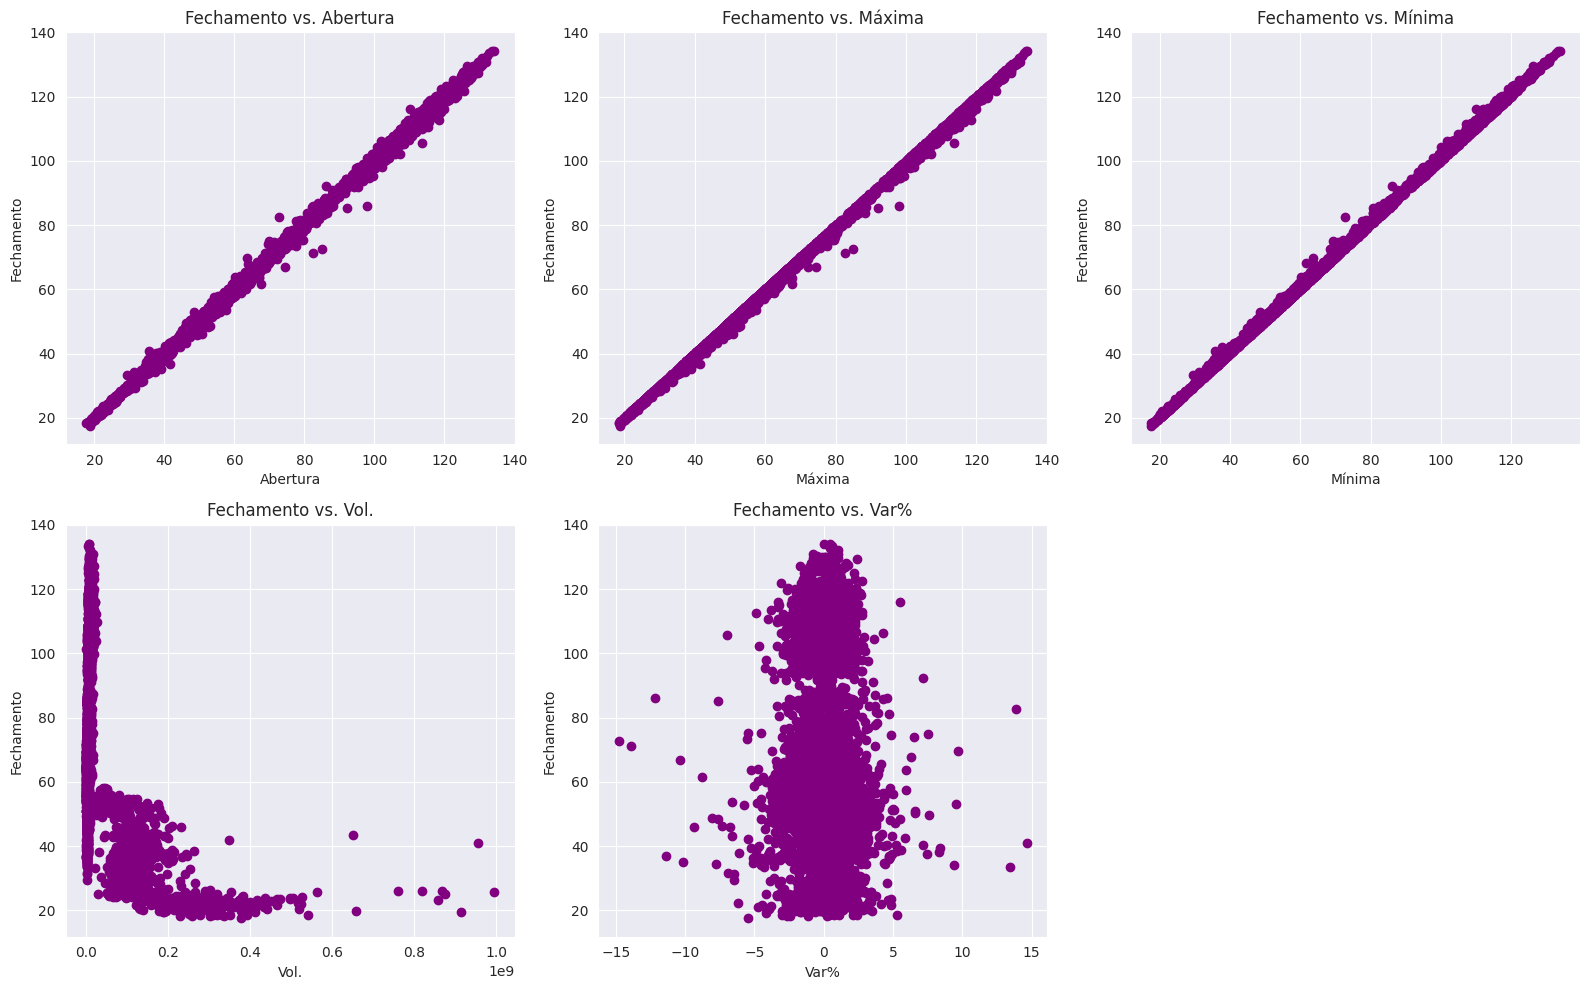

In [75]:

# Plotando gráficos de dispersão entre pares de variáveis numéricas
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.scatter(df['Abertura'], df['Último'], color='purple')
plt.title('Fechamento vs. Abertura')
plt.xlabel('Abertura')
plt.ylabel('Fechamento')

plt.subplot(2, 3, 2)
plt.scatter(df['Máxima'], df['Último'], color='purple')
plt.title('Fechamento vs. Máxima')
plt.xlabel('Máxima')
plt.ylabel('Fechamento')

plt.subplot(2, 3, 3)
plt.scatter(df['Mínima'], df['Último'], color='purple')
plt.title('Fechamento vs. Mínima')
plt.xlabel('Mínima')
plt.ylabel('Fechamento')

plt.subplot(2, 3, 4)
plt.scatter(df['Vol.'], df['Último'], color='purple')
plt.title('Fechamento vs. Vol.')
plt.xlabel('Vol.')
plt.ylabel('Fechamento')

plt.subplot(2, 3, 5)
plt.scatter(df['Var%'], df['Último'], color='purple')
plt.title('Fechamento vs. Var%')
plt.xlabel('Var%')
plt.ylabel('Fechamento')

plt.tight_layout()
plt.show()

In [76]:
#Teste de Dickey-Fuller

sns.set_style('darkgrid')
resultado = adfuller(df_fechamento['Último'])
print('Estatística ADF:', resultado[0])
print('Valor-p:', resultado[1])

if resultado[1] < 0.05:
    print('A série é estacionária (p-valor < 0.05)')
else:
    print('A série não é estacionária (p-valor > 0.05)')


Estatística ADF: -0.8704777955203472
Valor-p: 0.7975390025870868
A série não é estacionária (p-valor > 0.05)


#Transformando a série em estacionária

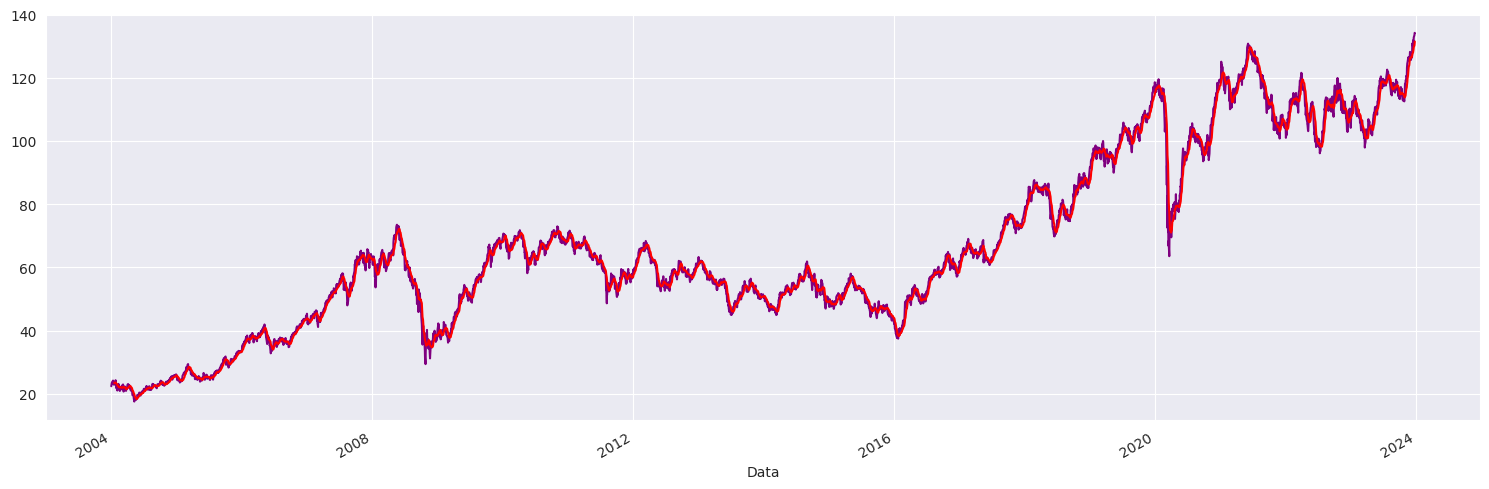

In [77]:
ma= df_fechamento.rolling(window=12).mean()

f, ax= plt.subplots(figsize=(15,5))
df_fechamento.plot(ax=ax, color='purple', legend=False)
ma.plot(ax=ax, color='red',  legend=False)
plt.tight_layout()
plt.show()

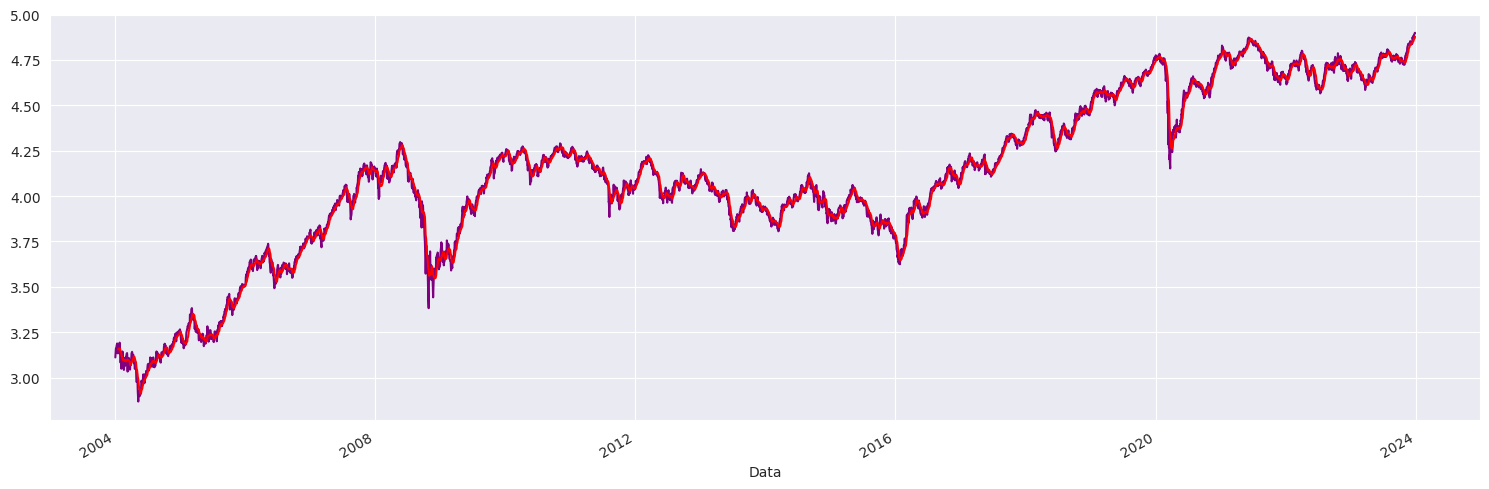

In [78]:
df_log= np.log(df_fechamento)
ma_log= df_log.rolling(window=12).mean()

f, ax= plt.subplots(figsize=(15,5))
df_log.plot(ax=ax, color='purple', legend=False)
ma_log.plot(ax=ax, color='red',  legend=False)
plt.tight_layout()
plt.show()